In [ ]:
# Nima Madadi


import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 0.3*x**4 - 0.1*x**3 - 2*x**2 - 0.8*x 
    
def df(x):  
    return 1.2*x**3 - 0.3*x**2 - 4*x - 0.8

In [10]:
class Optimizaers():

    def __init__(self, learningRate=0.1, iters=1000,beta1 = 0.9,beta2 = 0.9 ,epsilon = 1e-8,m=0,v=0 ):
        self.learningRate=learningRate
        self.iters=iters
        self.beta1=beta1
        self.beta2=beta2
        self.epsilon=epsilon
        self.x_min=None
        self.y_min=None
        self.m=m
        self.v=v

    def GradientDescent(self,x_init):
        x_opt=[]
        y_opt=[]
        x_opt.append(x_init)
        y_opt.append(f(x_init))
        for _ in range(self.iters):
            x_init =x_init - self.learningRate * df(x_init)
            y_result= f(x_init)
            x_opt.append(x_init)
            y_opt.append(y_result)

        self.x_min= x_init
        self.y_min= y_result
        r_min,r_max=-3,3
        Optimizaers.plot(self,r_min,r_max,f,x_opt,y_opt,"Gradient Descent")
        return

    def Adagrad(self,x_init):
        x_opt=[]
        y_opt=[]
        x_opt.append(x_init)
        y_opt.append(f(x_init))
        G=0
        for i in range(self.iters):
            G+=df(x_init)**2
            adjusted_lr =self.learningRate/(np.sqrt(G) + self.epsilon)
            x_init =x_init - adjusted_lr * df(x_init)
          
            y_result= f(x_init)
            x_opt.append(x_init)
            y_opt.append(y_result)

        self.x_min= x_init
        self.y_min= y_result
        r_min,r_max=-3,3
        Optimizaers.plot(self,r_min,r_max,f,x_opt,y_opt,"Adagrad")

        return

    def ADAM(self,x_init):
        x_opt=[]
        y_opt=[]
        x_opt.append(x_init)
        y_opt.append(f(x_init))
        for i in range(1, self.iters):
        
            gradient = df(x_init)
            self.m = self.beta1 * self.m + (1 - self.beta1) * gradient
            self.v = self.beta2 * self.v + (1 - self.beta2) * gradient**2
            m_hat = self.m / (1 - self.beta1**i)
            v_hat = self.v / (1 - self.beta2**i)
            x_init = x_init - self.learningRate * m_hat / (np.sqrt(v_hat) + self.epsilon)
            y_result= f(x_init)
            x_opt.append(x_init)
            y_opt.append(y_result)
            x_init=x_init

        self.x_min= x_init
        self.y_min= y_result
        r_min,r_max=-3,3
        Optimizaers.plot(self,r_min,r_max,f,x_opt,y_opt,"ADAM ")
        return  

    def RmsProp(self,x_init):
        x_opt=[x_init]
        y_opt=[f(x_init)]
        G = 0  
        for _ in range(self.iters):
            g = df(x_init)  
            G = self.beta2 * G + (1 - self.beta2) * g**2 
            x_init = x_init - (self.learningRate / np.sqrt(G + self.epsilon)) * g 
            y_result= f(x_init)
            x_opt.append(x_init)
            y_opt.append(y_result)
            
            if abs(g) < self.epsilon:  
                break
        self.x_min= x_init
        self.y_min= y_result
        Optimizaers.plot(self,-3,3,f,x_opt,y_opt,"RMSprop")   
        return

    def Momentum(self,x_init):
        x_opt=[]
        y_opt=[]
        x_opt.append(x_init)
        y_opt.append(f(x_init))
        momntum=0
        for i in range(self.iters):
            gradient= df(x_init)
            momntum = self.beta1*momntum + (1-self.beta1)* gradient
            x_init = x_init - (self.learningRate*momntum)
            y_result= f(x_init)
            x_opt.append(x_init)
            y_opt.append(y_result)
        self.x_min= x_init
        self.y_min= y_result
        r_min,r_max=-3,3
        Optimizaers.plot(self,r_min,r_max,f,x_opt,y_opt,"Momentum")
        return 

    def plot(self,r_min,r_max,f,x_optim,y_optim , title_):
        x = np.linspace(r_min, r_max, 1000)
        results = f(x)
        plt.figure(figsize=(8, 5))
        plt.title(f"{title_} Optimization at  {np.round(self.x_min,2)} and {np.round(self.y_min,2)}")
        plt.xlabel("X")
        plt.ylabel("F(x)")
        plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
        plt.axvline(0, color='black', linewidth=0.5, linestyle="--")
        plt.grid(True)
        plt.xlim(r_min, r_max)
        plt.plot(x, results, color="blue", label="F(X)")
        plt.plot(x_optim, y_optim, color="red",marker='o', label=f"{title_} Trajectory")
        plt.legend()
        plt.show()
        return  



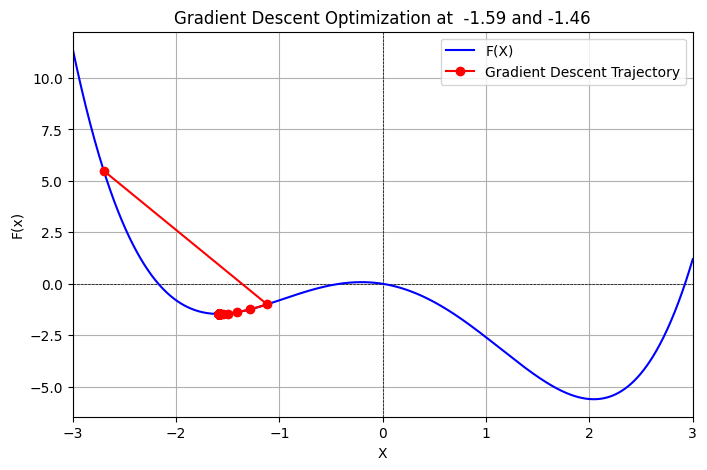

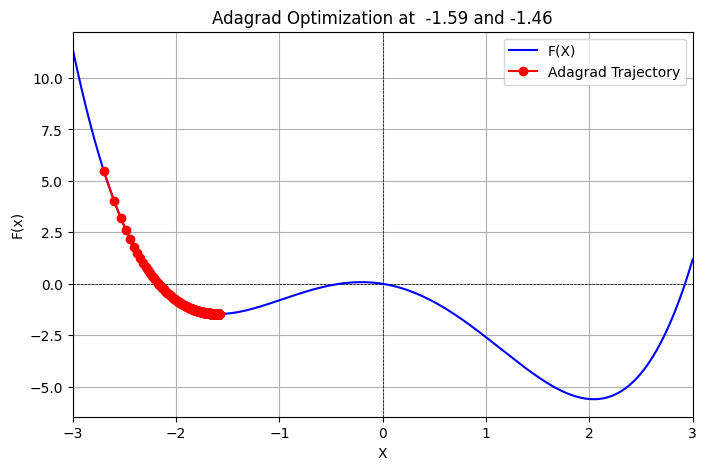

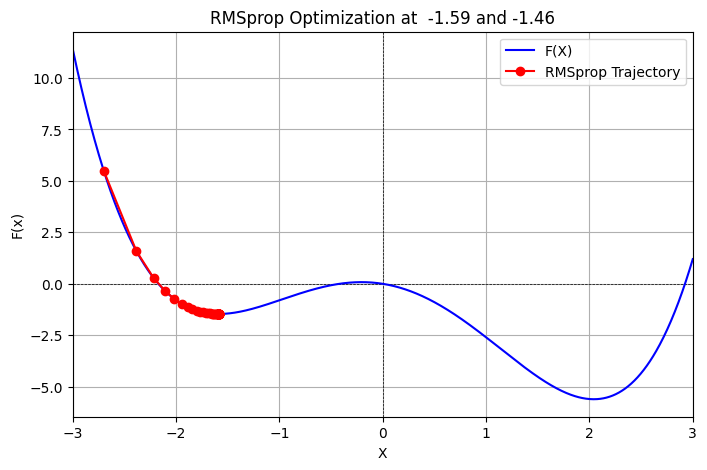

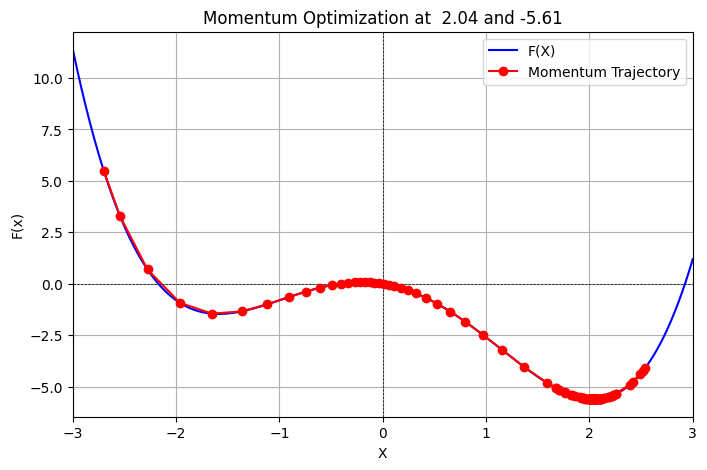

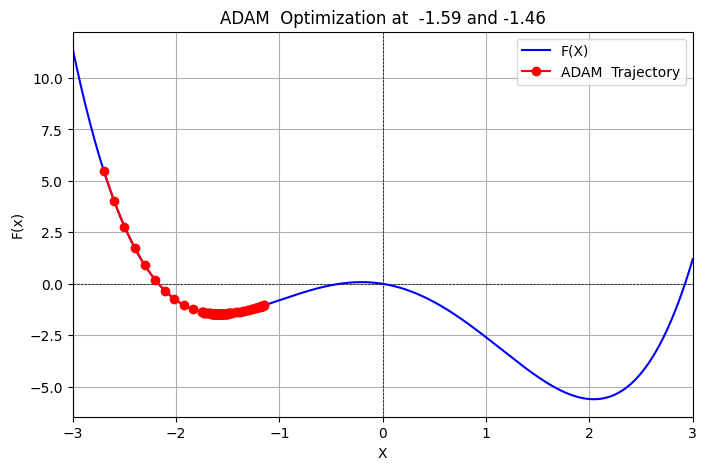

In [12]:
DeafultLR=-2.7
opt=Optimizaers()
opt.GradientDescent(DeafultLR)
opt.Adagrad(DeafultLR)
opt.RmsProp(DeafultLR)
opt.Momentum(DeafultLR) 
opt.ADAM(DeafultLR)